# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [18]:
# imports
import pandas as pd


In [19]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [20]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresión (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparación entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* Métricas (todas, y que aporta cada una)

* Conclusiones finales

# Implementación

## EDA

### Age

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
0    18
Name: age, dtype: int64


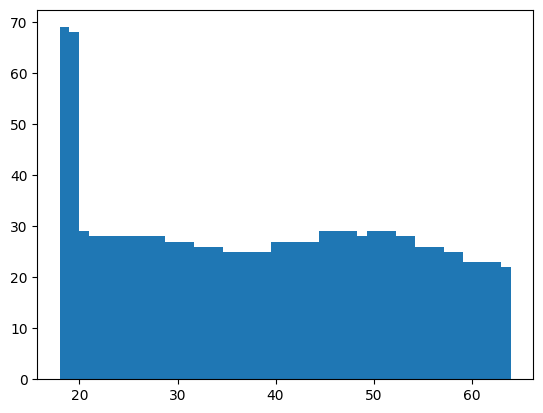

In [21]:
data["age"].hist(bins=47, grid=False)
print(data["age"].describe())
print(data["age"].mode())

Tenemos demasiadas instancias de 18 y 19 amaños. Esto podria causar que el modelo prediga demasiado bien estas edades y muy mal el resto.

### Sex

<Axes: ylabel='count'>

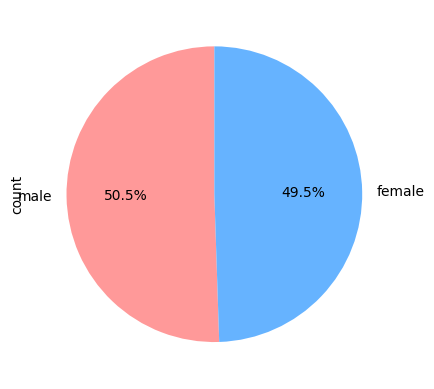

In [22]:
data['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

Se ve bien. 

### Bmi

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
0    32.3
Name: bmi, dtype: float64


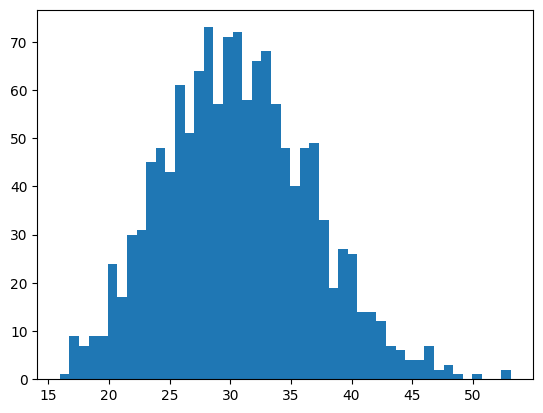

In [23]:
data["bmi"].hist(bins=47, grid=False)
print(data["bmi"].describe())
print(data["bmi"].mode())

### Children

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


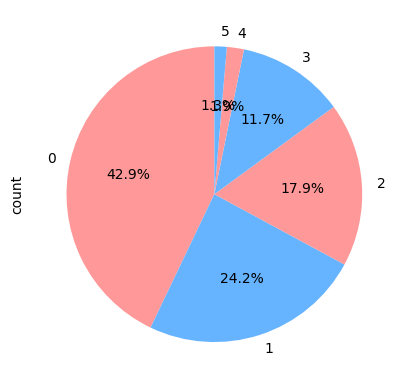

In [24]:
data['children'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
print(data['children'].value_counts())

Muy pocos casos con 4 o 5 hijos. Esto podria causar problemas en las predicciones. 

### Smoker

smoker
no     1064
yes     274
Name: count, dtype: int64


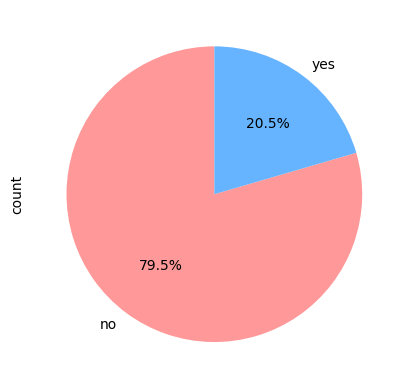

In [25]:
data['smoker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
print(data['smoker'].value_counts())

De nuevo tenemos muchos más casos de no fumadores que de fumadores, esto podria causar problemas tambien.

### Region

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


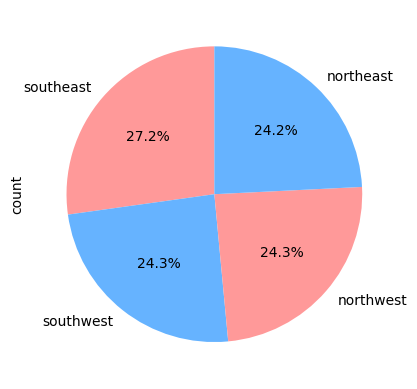

In [26]:
data['region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
print(data['region'].value_counts())

esta muestra una distribución bastante equitativa. No deveria cuasar problemas.

### Charges = variable objetivo

In [27]:
print(data['charges'].nunique())

1337


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
0    1639.5631
Name: charges, dtype: float64


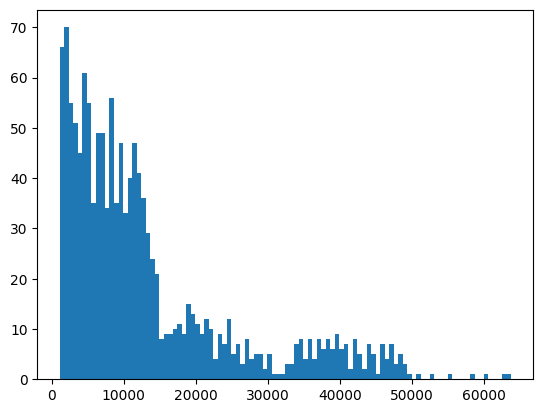

In [28]:
data["charges"].hist(bins=100, grid=False)
print(data["charges"].describe())
print(data["charges"].mode())

El 75% de los datos se encuentran por debajo de 16000 el resto se reparten desde este hasta por encima del 60000. Esto podría causar problemas.

## Modelos

#### Polinomial features

### Normalizar y codificar variables.

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop(columns=['charges'])
y = data['charges']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

# Apply the transformations to the data
X_trans = preprocessor.fit_transform(X)
# Standardize the target variable
scaler_y = StandardScaler()
y_trans = scaler_y.fit_transform(y.values.reshape(-1, 1))



print(X.shape)
print(X_trans.shape)

(1338, 6)
(1338, 11)


In [30]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X_trans)

### Train test val split

In [31]:
from sklearn.model_selection import train_test_split


# 80 % TRAIN, 10% VAL y 10 % TEST
X_train, X_test_val, y_train, y_test_val = train_test_split(X_trans, y_trans, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=0)

Xpoly_train, Xpoly_test_val, ypoly_train, ypoly_test_val = train_test_split(X_poly, y_trans, test_size=0.2, random_state=0)
Xpoly_test, Xpoly_val, ypoly_test, ypoly_val = train_test_split(Xpoly_test_val, ypoly_test_val, test_size=0.5, random_state=0)

print('Datos 2 de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos 2 de Entrenamiento: 1070
Datos de Validación: 134
Datos de Test: 134


### Elastic net

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error


# Entrenar modelos con Elastic Net
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.3)
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)

mse = mean_squared_error(y_test, elastic_net_predictions)

print("MSE en elastic sin poly:", mse)

elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.3)
elastic_net.fit(Xpoly_train, ypoly_train)
elastic_net_predictions = elastic_net.predict(Xpoly_test)

mse = mean_squared_error(ypoly_test, elastic_net_predictions)

print("MSE en elastic con poly:", mse)

MSE en elastic sin poly: 0.17762675236098613
MSE en elastic con poly: 0.07604427080773946


c:\Users\veint\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+00, tolerance: 1.047e-01
  model = cd_fast.enet_coordinate_descent(


Se puede ver que agregar caracteristicas polinomicas ayuda a la predicción

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters to test
max_depths = [3, 5, 7, 10]
min_samples_splits = [2, 5, 10]

# Initialize variables to store the best parameters and lowest MSE
best_params = {}
lowest_mse = float('inf')

# Loop through all combinations of hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Train Decision Tree with original training data
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        decision_tree.fit(X_train, y_train)
        dt_predictions = decision_tree.predict(X_test)
        mse_dt = mean_squared_error(y_test, dt_predictions)

        # Train Decision Tree with polynomial features training data
        decision_tree_poly = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        decision_tree_poly.fit(Xpoly_train, ypoly_train)
        dt_poly_predictions = decision_tree_poly.predict(Xpoly_test)
        mse_dt_poly = mean_squared_error(ypoly_test, dt_poly_predictions)

        # Check if this combination has the lowest MSE
        if mse_dt < lowest_mse:
            lowest_mse = mse_dt
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'poly': False}

        if mse_dt_poly < lowest_mse:
            lowest_mse = mse_dt_poly
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'poly': True}

print("Best parameters:", best_params)
print("Lowest MSE:", lowest_mse)

Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'poly': True}
Lowest MSE: 0.058313071652105454


In [35]:

# Train Decision Tree with original training data
decision_tree = DecisionTreeRegressor(max_depth=3,min_samples_leaf=2,random_state=0)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_predictions)
print("MSE en Decision Tree sin poly:", mse_dt)

# Train Decision Tree with polynomial features training data
decision_tree_poly = DecisionTreeRegressor(max_depth=3,min_samples_leaf=2,random_state=0)
decision_tree_poly.fit(Xpoly_train, ypoly_train)
dt_poly_predictions = decision_tree_poly.predict(Xpoly_test)

mse_dt_poly = mean_squared_error(ypoly_test, dt_poly_predictions)
print("MSE en Decision Tree con poly:", mse_dt_poly)

MSE en Decision Tree sin poly: 0.061915873435651934
MSE en Decision Tree con poly: 0.058313071652105454


Los resultados mejoran, poly sigue mejorando los resultados de forma standar

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters to test
n_estimators = [50, 100, 200]
max_depths = [3, 5, 7, 10]
min_samples_splits = [2, 5, 10]

# Initialize variables to store the best parameters and lowest MSE
best_params_rf = {}
lowest_mse_rf = float('inf')

# Loop through all combinations of hyperparameters
for n_estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            # Train Random Forest with original training data
            random_forest = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
            random_forest.fit(X_train, y_train.ravel())
            rf_predictions = random_forest.predict(X_val)
            mse_rf = mean_squared_error(y_val, rf_predictions)

            # Train Random Forest with polynomial features training data
            random_forest_poly = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
            random_forest_poly.fit(Xpoly_train, ypoly_train.ravel())
            rf_poly_predictions = random_forest_poly.predict(Xpoly_val)
            mse_rf_poly = mean_squared_error(ypoly_val, rf_poly_predictions)

            # Check if this combination has the lowest MSE
            if mse_rf < lowest_mse_rf:
                lowest_mse_rf = mse_rf
                best_params_rf = {'n_estimators': n_estimator, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'poly': False}

            if mse_rf_poly < lowest_mse_rf:
                lowest_mse_rf = mse_rf_poly
                best_params_rf = {'n_estimators': n_estimator, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'poly': True}

print("Best parameters for Random Forest:", best_params_rf)
print("Lowest MSE for Random Forest:", lowest_mse_rf)

Best parameters for Random Forest: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2, 'poly': True}
Lowest MSE for Random Forest: 0.1663258357065687


In [38]:
# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_split=2, random_state=0)

# Train the model with the original training data
random_forest.fit(X_train, y_train.ravel())
rf_predictions = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_predictions)
print("MSE en Random Forest sin poly:", mse_rf)

# Train the model with the polynomial features training data
random_forest_poly = RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_split=2, random_state=0)

random_forest_poly.fit(Xpoly_train, ypoly_train.ravel())
rf_poly_predictions = random_forest_poly.predict(Xpoly_test)
mse_rf_poly = mean_squared_error(ypoly_test, rf_poly_predictions)
print("MSE en Random Forest con poly:", mse_rf_poly)

MSE en Random Forest sin poly: 0.05456786235141867
MSE en Random Forest con poly: 0.052259678045178226


mejora aún más los resultados y poly mantiene los mejores.

Test con val

In [39]:
rf_poly_predictions = random_forest_poly.predict(Xpoly_val)
mse_rf_poly = mean_squared_error(ypoly_val, rf_poly_predictions)
print("MSE en Random Forest con poly:", mse_rf_poly)


MSE en Random Forest con poly: 0.1663258357065687


# Conclusiones

Los mejores resultados son los obtenidos mediante un random forest de 50 estimadores, una profundidad maxima de 5 divisiones, 2 elementos minimos para de hacer una división y caracteristicas polinomicas. 